# Stochastic Programs

In [2]:
import random

def rollDie():
    """Returns a random int between 1 and 6"""
    return random.choice([1,2,3,4,5,6])

def rollN(n):
    result = ''
    for i in range(n):
        result = result + str(rollDie())
    print(result)

In [4]:
rollN(10)

6224454151


## Inferential Statistics

In [5]:
def flip(numFlips):
    """Assumes numFlips a posititve int"""
    heads = 0
    for i in range(numFlips):
        if random.choice(('H','T')) == 'H':
            heads += 1
    return heads/numFlips

def filpSim(numFlipsPerTrial, numTrials):
    """Assumes numFlipsPerTrial and numTrials are positive ints"""
    fracHeads  = []
    for i in range(numTrials):
        fracHeads.append(flip(numFlipsPerTrial))
    mean = sum(fracHeads)/len(fracHeads)
    return mean

In [8]:
print('Mean =', filpSim(10,1))
print('Mean =', filpSim(10,1))

print('Mean =', filpSim(100,1000000))
print('Mean =', filpSim(100,1000000))

Mean = 0.3
Mean = 0.6
Mean = 0.4999822199999952
Mean = 0.4999890200000247


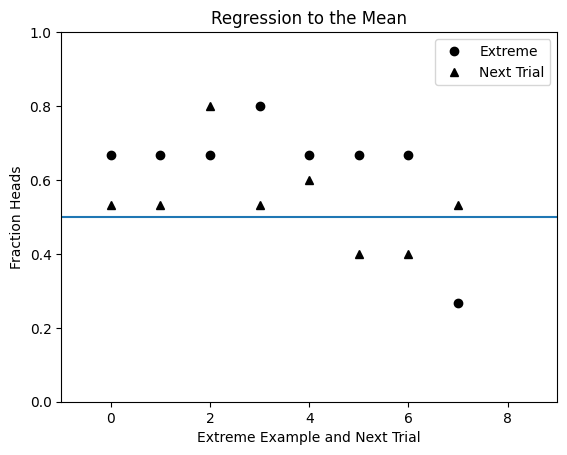

In [13]:
import pylab

def regressToMean(numFlips, numTrials):
    #Get fraction of heads fro each trial of numFlips
    fracHeads = []
    for t in range(numTrials):
        fracHeads.append(flip(numFlips))
    #Find trials with extreme results and for each the next trial
    extremes, nextTrials = [],[]
    for i in range(len(fracHeads)-1):
        if fracHeads[i] < 0.33 or fracHeads[i] > 0.66:
            extremes.append(fracHeads[i])
            nextTrials.append(fracHeads[i+1])
    #Plot Results
    pylab.plot(range(len(extremes)), extremes, 'ko', label = 'Extreme')
    pylab.plot(range(len(nextTrials)), nextTrials, 'k^', label = 'Next Trial')
    pylab.axhline(0.5)
    pylab.ylim(0,1)
    pylab.xlim(-1, len(extremes) + 1)
    pylab.xlabel('Extreme Example and Next Trial')
    pylab.ylabel('Fraction Heads')
    pylab.title('Regression to the Mean')
    pylab.legend(loc = 'best')
    
regressToMean(15, 40)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


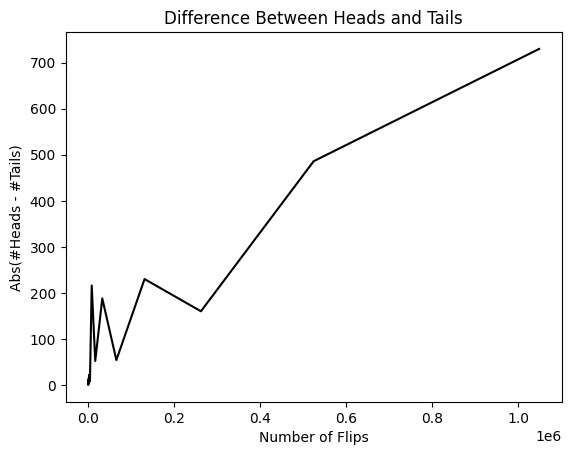

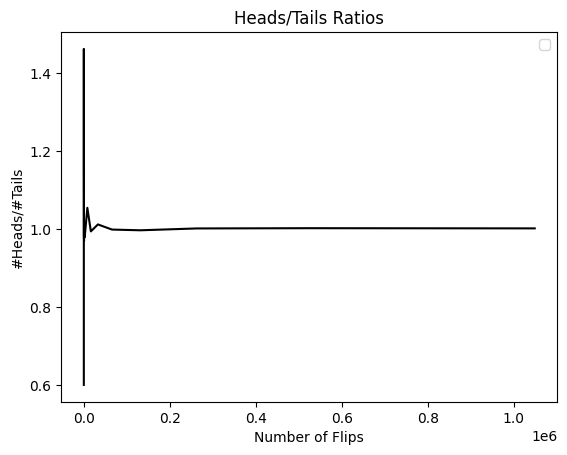

In [19]:
# Plotting the results of coin flips

def flipPlot(minExp, maxExp):
    """Assumes minExp and maxExp are positive integers; minExp < maxExp
    Plots results of 2**minExp and 2**maxExp coin flips"""
    ratios, diffs, xAxis = [],[],[]
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        numHeads = 0
        for n in range(numFlips):
            if random.choice(('H','T')) == 'H':
                numHeads += 1
        numTails = numFlips - numHeads
        try:
            ratios.append(numHeads/numTails)
            diffs.append(abs(numHeads - numTails))
        except ZeroDivisionError:
            continue
    #Plot Results
    pylab.title('Difference Between Heads and Tails')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Abs(#Heads - #Tails)')
    pylab.plot(xAxis, diffs, 'k')
    pylab.figure()
    pylab.title('Heads/Tails Ratios')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('#Heads/#Tails')
    pylab.plot(xAxis, ratios, 'k')
    
    pylab.legend(loc = 'best')
    
random.seed(0)
flipPlot(4, 20)

# Add Variance and Standard Deviation

In [28]:
def variance(X):
    """Assumes that X is a list of numbers.
    Returns the standard deviation of X"""
    mean = sum(X)/len(X)
    tot = 0.0
    for x in X:
        tot  += (x-mean)**2
    return tot/len(X)

def stdDev(X):
    """Assumes that X is a list of numbers.
    Returns the standard deviation of X"""
    return variance(X)**0.5



In [35]:
def makePlot(xVals, yVals, title, xLabel, yLabel, style, logX = False, logY = False):
    pylab.figure()
    pylab.title(title)
    pylab.xlabel(xLabel)
    pylab.ylabel(yLabel)
    pylab.plot(xVals, yVals, style)
    if logX:
        pylab.semilogx()
    if logY:
        pylab.semilogy()
        

In [36]:
def runTrial(numFlips):
    numHeads = 0
    for n in range(numFlips):
        if random.choice(('H','T')) == 'H':
            numHeads += 1
    numTails = numFlips - numHeads
    return (numHeads, numTails)        

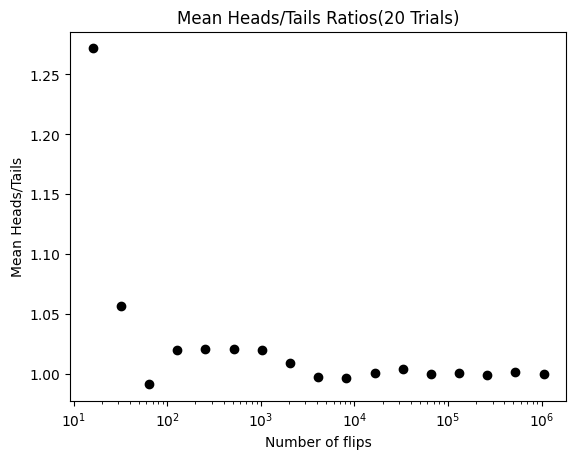

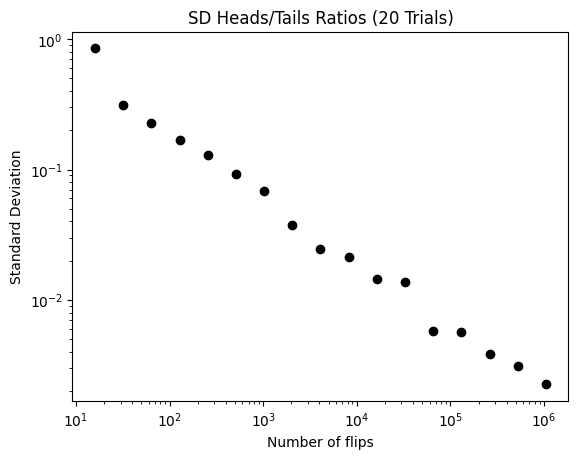

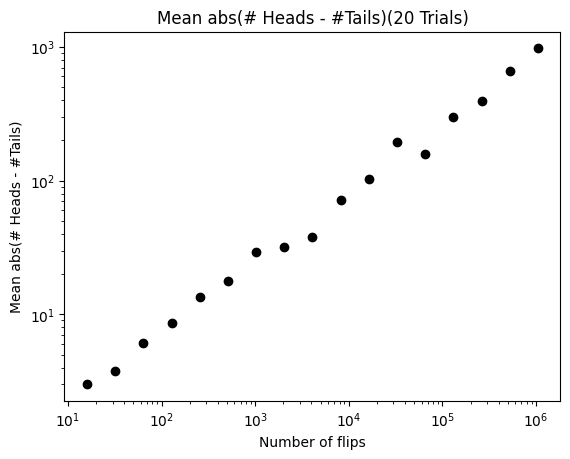

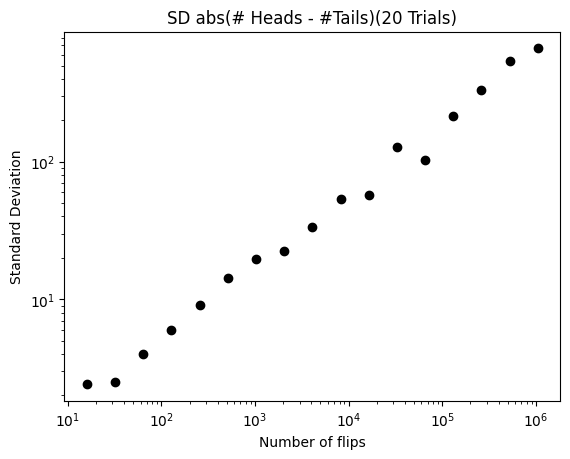

In [41]:
# Plotting the results of coin flips

def flipPlot1(minExp, maxExp, numTrials):
    """Assumes minExp, maxExp and numTrials positive integers; minExp < maxExp
    Plot shows summaries of results of 2**minExp and 2**maxExp coin flips"""
    ratiosMeans, diffsMeans, ratioSDs, diffSDs = [],[],[],[]
    xAxis = []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        ratios, diffs = [],[]
        for t in range(numTrials):
            numHeads, numTails = runTrial(numFlips)
            ratios.append(numHeads/numTails)
            diffs.append(abs(numHeads - numTails))
        ratiosMeans.append(sum(ratios)/numTrials)
        diffsMeans.append(sum(diffs)/numTrials)
        ratioSDs.append(stdDev(ratios))
        diffSDs.append(stdDev(diffs))
    numTrialString = '(' + str(numTrials) + ' Trials)'
    title = 'Mean Heads/Tails Ratios' + numTrialString
    makePlot(xAxis, ratiosMeans, title, 'Number of flips', 'Mean Heads/Tails', 'ko', logX=True)
    title = 'SD Heads/Tails Ratios ' + numTrialString
    makePlot(xAxis, ratioSDs, title, 'Number of flips', 'Standard Deviation', 'ko', logX = True, logY = True)
    title = 'Mean abs(# Heads - #Tails)' + numTrialString
    makePlot(xAxis, diffsMeans, title, 'Number of flips', 'Mean abs(# Heads - #Tails)', 'ko', logX=True, logY = True)
    title = 'SD abs(# Heads - #Tails)' + numTrialString
    makePlot(xAxis, diffSDs, title, 'Number of flips', 'Standard Deviation', 'ko', logX = True, logY = True)
    
random.seed(0)
flipPlot1(4, 20, 20)

In [43]:
def CV(X):
    mean = sum(X)/len(X)
    try:
        return stdDev(X)/mean 
    except ZeroDivisionError:
        return float('nan')

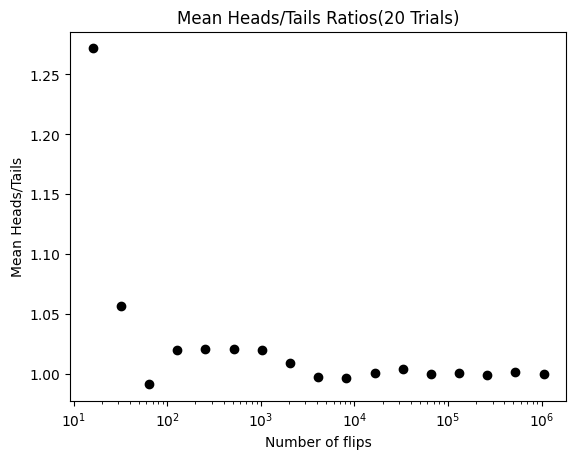

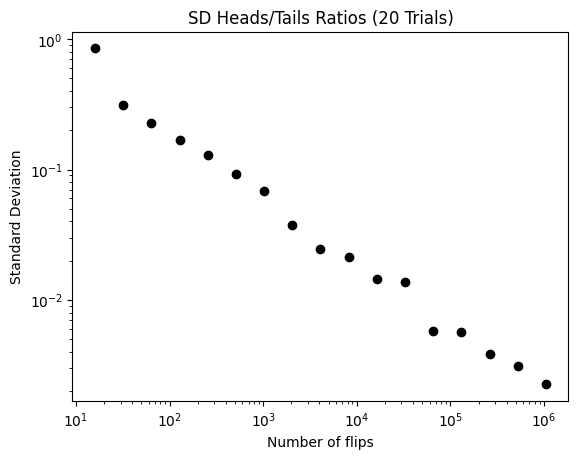

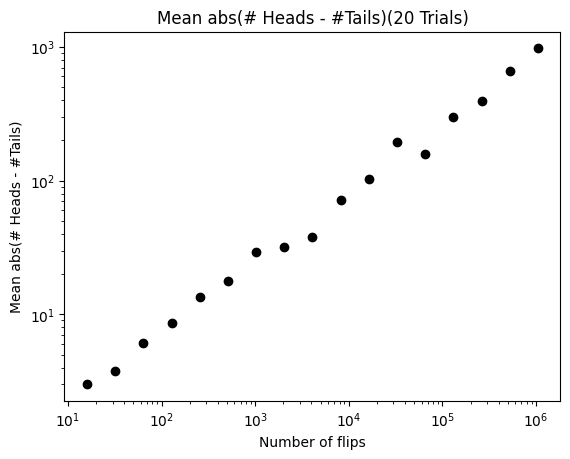

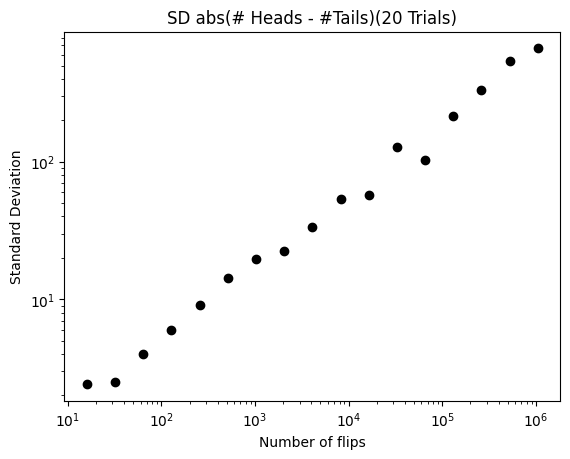

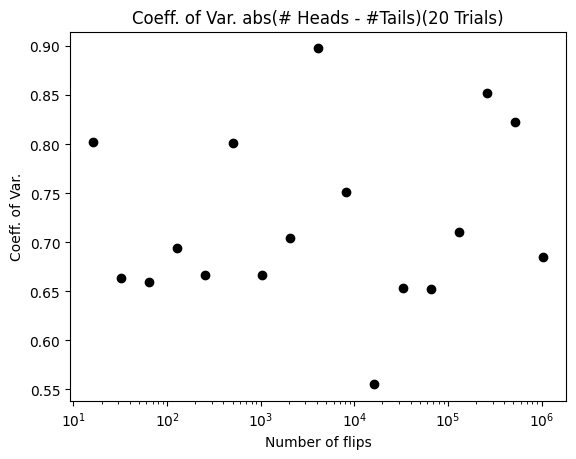

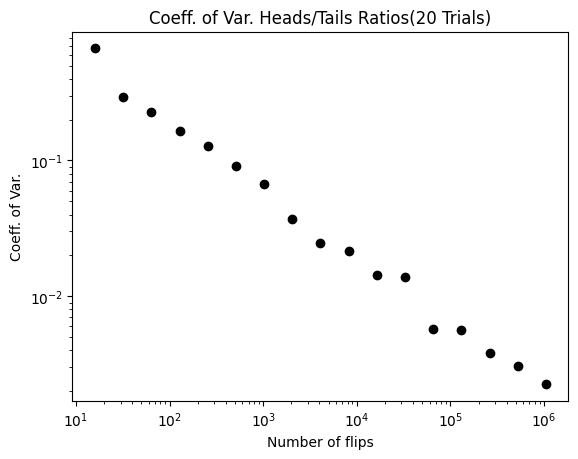

In [45]:
# Plotting the results of coin flips

def flipPlot2(minExp, maxExp, numTrials):
    """Assumes minExp, maxExp and numTrials positive integers; minExp < maxExp
    Plot shows summaries of results of 2**minExp and 2**maxExp coin flips"""
    ratiosMeans, diffsMeans, ratioSDs, diffSDs = [],[],[],[]
    ratiosCVs, diffsCVs, xAxis = [],[],[]
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        ratios, diffs = [],[]
        for t in range(numTrials):
            numHeads, numTails = runTrial(numFlips)
            ratios.append(numHeads/numTails)
            diffs.append(abs(numHeads - numTails))
        ratiosMeans.append(sum(ratios)/numTrials)
        diffsMeans.append(sum(diffs)/numTrials)
        ratioSDs.append(stdDev(ratios))
        diffSDs.append(stdDev(diffs))
        ratiosCVs.append(CV(ratios))
        diffsCVs.append(CV(diffs))
    numTrialString = '(' + str(numTrials) + ' Trials)'
    title = 'Mean Heads/Tails Ratios' + numTrialString
    makePlot(xAxis, ratiosMeans, title, 'Number of flips', 'Mean Heads/Tails', 'ko', logX=True)
    title = 'SD Heads/Tails Ratios ' + numTrialString
    makePlot(xAxis, ratioSDs, title, 'Number of flips', 'Standard Deviation', 'ko', logX = True, logY = True)
    title = 'Mean abs(# Heads - #Tails)' + numTrialString
    makePlot(xAxis, diffsMeans, title, 'Number of flips', 'Mean abs(# Heads - #Tails)', 'ko', logX=True, logY = True)
    title = 'SD abs(# Heads - #Tails)' + numTrialString
    makePlot(xAxis, diffSDs, title, 'Number of flips', 'Standard Deviation', 'ko', logX = True, logY = True)
    
    title = 'Coeff. of Var. abs(# Heads - #Tails)' + numTrialString
    makePlot(xAxis, diffsCVs, title, 'Number of flips', 'Coeff. of Var.', 'ko', logX=True)
    title = 'Coeff. of Var. Heads/Tails Ratios' + numTrialString
    makePlot(xAxis, ratiosCVs, title, 'Number of flips', 'Coeff. of Var.', 'ko', logX = True, logY = True)
    
random.seed(0)
flipPlot2(4, 20, 20)